In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np
import tarfile
import os
import cv2

# Fetch Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Dataset Analysis

In [3]:
x_train.shape

(60000, 28, 28)

**Plot the distribution of the labels**

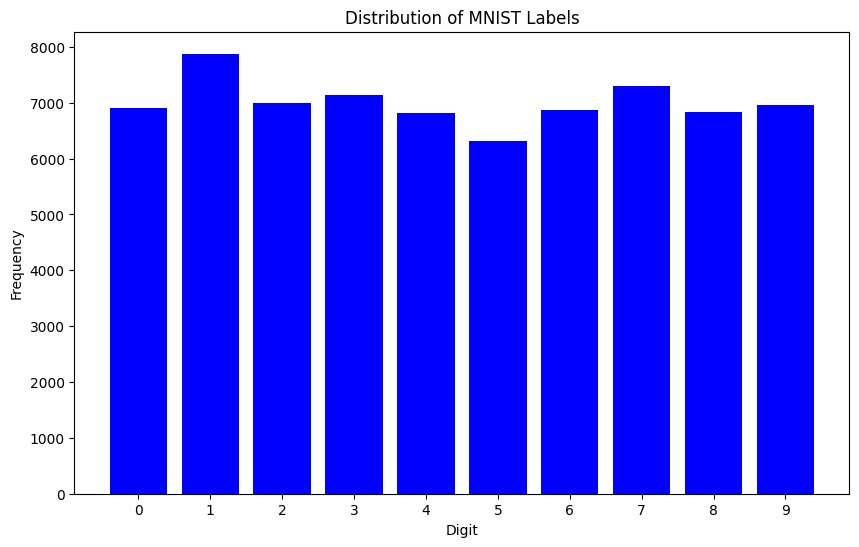

In [4]:
all_labels = np.concatenate((y_train, y_test))
label_counts = np.bincount(all_labels, minlength=10)
plt.figure(figsize=(10, 6))
plt.bar(range(10), label_counts, color='blue')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Distribution of MNIST Labels')
plt.xticks(range(10))
plt.show()

**several sample of dataset**

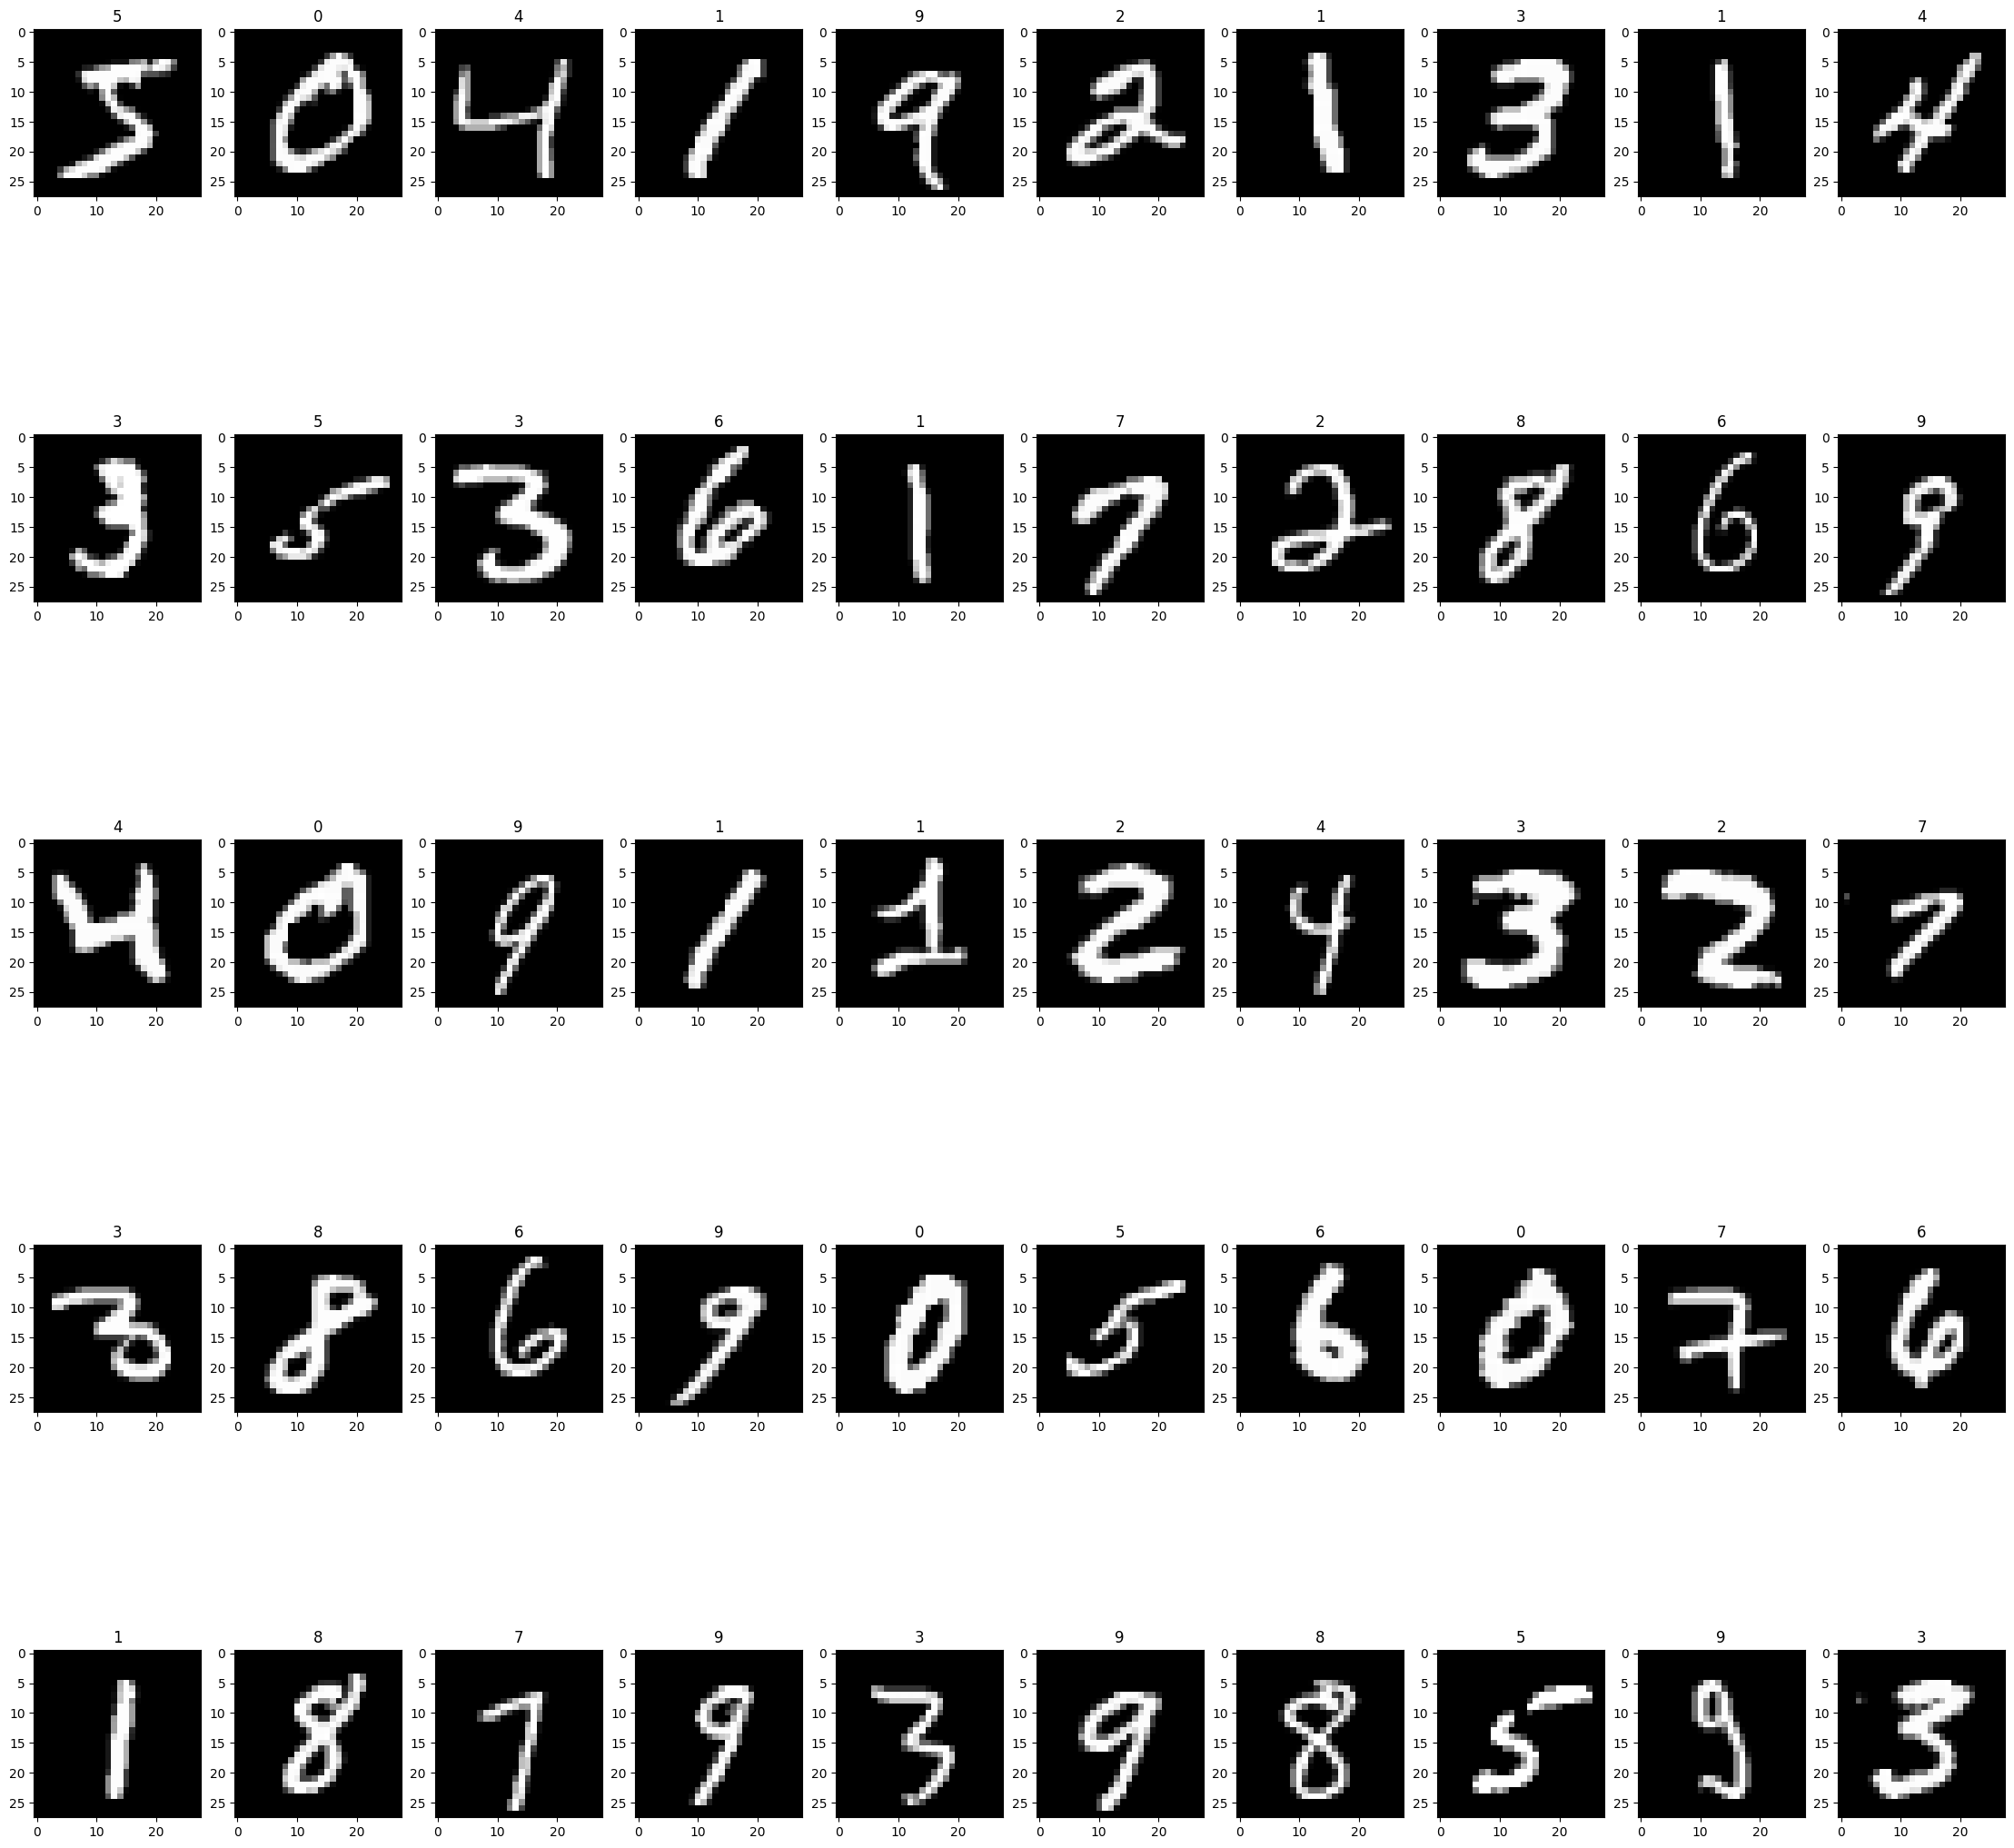

In [5]:
fig, ax = plt.subplots(5, 10, figsize=(28,28))
ax = ax.flatten()
for i in range(50):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].title.set_text(y_train[i])

**Split test to test & validation**

In [6]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.2, random_state=42)

**Data Augmentation**

In [7]:
datagen = ImageDataGenerator(rotation_range=45, width_shift_range=0.2, height_shift_range=0.2)

**Normalizing**

In [8]:
x_train, x_test, x_val = x_train/255.0, x_test/255.0, x_val/255.0

# Model

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 512)       590336    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 512)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 512)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 1024)        4

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
x_train = x_train.reshape(-1, 28, 28, 1)
datagen.fit(x_train)
his = model.fit(datagen.flow(x_train, y_train, batch_size=2048), validation_data=(x_val, y_val), epochs=120, batch_size=2048)

Epoch 1/120
30/30 [==============================] - 43s 735ms/step - loss: 1.9909 - accuracy: 0.2718 - val_loss: 0.8138 - val_accuracy: 0.7690
Epoch 2/120
30/30 [==============================] - 12s 377ms/step - loss: 0.9946 - accuracy: 0.6606 - val_loss: 0.5048 - val_accuracy: 0.8455
Epoch 3/120
30/30 [==============================] - 11s 369ms/step - loss: 0.6134 - accuracy: 0.8044 - val_loss: 0.2285 - val_accuracy: 0.9295
Epoch 4/120
30/30 [==============================] - 12s 379ms/step - loss: 0.3554 - accuracy: 0.8885 - val_loss: 0.1409 - val_accuracy: 0.9575
Epoch 5/120
30/30 [==============================] - 12s 379ms/step - loss: 0.2645 - accuracy: 0.9172 - val_loss: 0.1621 - val_accuracy: 0.9490
Epoch 6/120
30/30 [==============================] - 12s 381ms/step - loss: 0.2126 - accuracy: 0.9339 - val_loss: 0.1208 - val_accuracy: 0.9595
Epoch 7/120
30/30 [==============================] - 11s 370ms/step - loss: 0.2029 - accuracy: 0.9370 - val_loss: 0.1039 - val_accuracy:

In [13]:
model.evaluate(x_test, y_test)

250/250 [==============================] - 2s 5ms/step - loss: 0.0217 - accuracy: 0.9927


[0.021749036386609077, 0.9927499890327454]

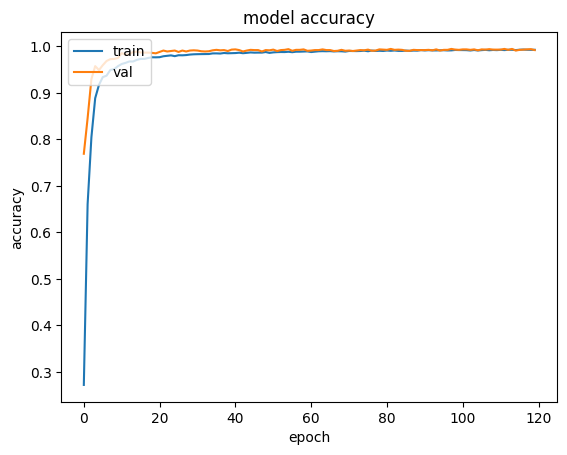

In [14]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model result Analysis

In [15]:
y_pred = model.predict(x_test)

250/250 [==============================] - 1s 4ms/step


In [16]:
y_pred = np.argmax(y_pred, axis=1)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       777
           1       1.00      0.99      1.00       919
           2       0.99      0.99      0.99       819
           3       0.99      1.00      0.99       802
           4       0.99      1.00      0.99       767
           5       1.00      0.99      0.99       718
           6       0.99      0.99      0.99       758
           7       0.99      0.99      0.99       841
           8       0.99      0.99      0.99       788
           9       1.00      0.98      0.99       811

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [19]:
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

In [20]:
for i, accuracy in enumerate(class_accuracies):
    print(f'Accuracy for class {i}: {accuracy * 100:.2f}%')

Accuracy for class 0: 100.00%
Accuracy for class 1: 99.35%
Accuracy for class 2: 99.15%
Accuracy for class 3: 99.88%
Accuracy for class 4: 99.61%
Accuracy for class 5: 98.75%
Accuracy for class 6: 99.34%
Accuracy for class 7: 99.17%
Accuracy for class 8: 99.49%
Accuracy for class 9: 98.03%


# Save my Model

In [21]:
model.save('my_model2.h5')

# Average confidence

In [22]:
res = model.predict(x_test.reshape(-1,28,28,1))

250/250 [==============================] - 1s 4ms/step


In [23]:
sumation = [np.max(res[i]) for i in range(res.shape[0])]
print(f'Average ACC is : {np.mean(sumation)}')

Average ACC is : 0.9957395195960999
